<font size ='5'>Let's Import the dataset and necessary libraries.</font>

In [48]:
import pandas as pd

<font size ='5'>I am importing random because i'm trying to generate new columns, age, gender, location and device type to make for better analysis.</font>

In [49]:
import random

In [50]:
df = pd.read_excel(r"C:\Users\mowan\Desktop\Data Science\Web Performance Analysis\Updated_Dataset.xlsx")

print(df.head())

  Marketing Channels Date + Hour (YYYY-MM-DD-HR)  No. Of Users  \
0     Direct Website         2024-04-16 23:00:00           237   
1  From Social Media         2024-04-17 19:00:00           208   
2     Direct Website         2024-04-17 23:00:00           188   
3  From Social Media         2024-04-17 18:00:00           187   
4  From Social Media         2024-04-17 20:00:00           175   

   No. Of Session of Users  Engaged sessions  \
0                      300               144   
1                      267               132   
2                      233               115   
3                      256               125   
4                      221               112   

   Average Engagement Time Per Session in Seconds  Engaged Sessions Per User  \
0                                       47.526667                   0.607595   
1                                       32.097378                   0.634615   
2                                       39.939914                   0.6117

<font size ='5'>Now, let's start our analysis our analysis.</font>

<font size ='5'>To analyze and optimize the web traffic and user engagement, let's answer questions around the following:</font>

<font size ='5'>**A. Traffic Sources and Demographics**</font>

<font size ='5'>1. Where is FitFusion website traffic coming from?</font>

<font size ='4'>To determine where FitFusion website traffic is coming from based on the marketing channels, let's do the following:</font>

In [46]:
#1. Let's Group and Summarize Traffic by Marketing Channels and sort it from the highest to the lowest traffic.
df.groupby("Marketing Channels")["No. Of Users"].sum().reset_index().sort_values(by="No. Of Users", ascending=False)

,Marketing Channels,No. Of Users
3,From Social Media,47572
0,Direct Website,30042
4,Organic Search,28387
2,From Another Website,26774
6,Uncategorized,540
5,Organic Video,123
1,Email Marketing,2


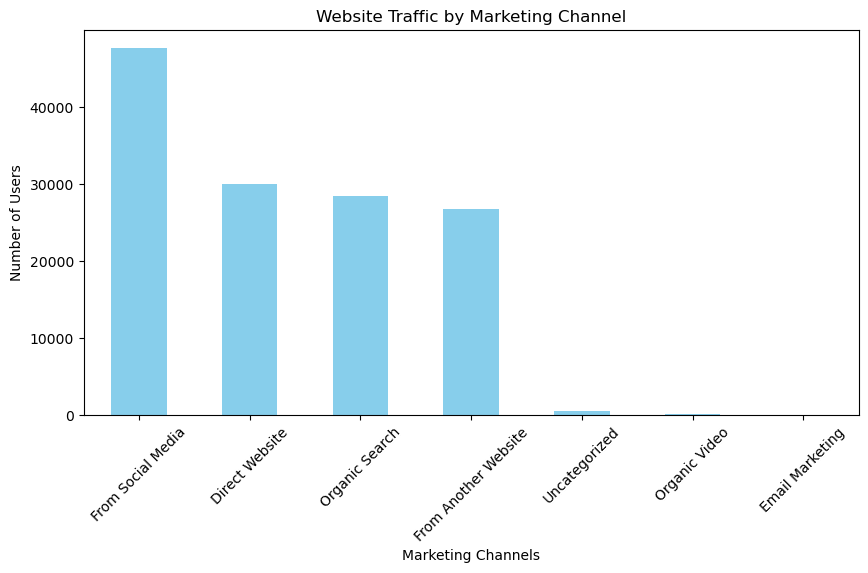

In [47]:
#2. Let's visualize this insight.
import matplotlib.pyplot as plt

traffic_source = traffic_source = df.groupby("Marketing Channels")["No. Of Users"].sum().sort_values(ascending=False)

%matplotlib inline

plt.figure(figsize=(10, 5))
traffic_source.plot(kind="bar", color="skyblue")
plt.xlabel("Marketing Channels")
plt.ylabel("Number of Users")
plt.title("Website Traffic by Marketing Channel")
plt.xticks(rotation=45)

plt.savefig("Marketing Channels Chart.png", dpi=300, bbox_inches="tight")
plt.show()


<font size ='5'>2. What are the demographics of my website visitors by age, gender, location, device type?</font>

<font size ='5'>Let's see how many users we have by age and age groups</font>

In [51]:
#1. Let's Group and Summarize Traffic by 'Age Groups' and sort it from the highest to the lowest traffic.
df.groupby("Age Groups")["No. Of Users"].sum().reset_index().sort_values(by="No. Of Users", ascending=False)

,Age Groups,No. Of Users
2,Young Adults,57492
0,Adults,46386
1,Old People,29562


In [98]:
#Now, let's visualize this result above by actual users count and percentages

import plotly.express as px

# let's count the occurrences of each age group
age_group_counts = df["Age Groups"].value_counts().reset_index()
age_group_counts.columns = ["Age Groups", "Count"]

# Let's calculate the percentages too.
total_count = age_group_counts["Count"].sum()
age_group_counts["Percentage"] = (age_group_counts["Count"] / total_count) * 100

# Let's sort values from highest to lowest
age_group_counts = age_group_counts.sort_values(by="Count", ascending=False)

# Let's create an interactive bar chart 
fig = px.bar(age_group_counts, 
             x="Age Groups", 
             y="Count", 
             color="Age Groups",
             title="Distribution of Users by Age Group",
             text="Count")

# Let's add percentages above the counts
for i, row in age_group_counts.iterrows():
    fig.add_annotation(
        x=row["Age Groups"],
        y=row["Count"],
        text=f"{row['Percentage']:.1f}%",  # Formats percentage to one decimal place
        showarrow=False,
        yanchor="bottom",
        yshift=20,  # Adjust vertical position
        font=dict(size=10) #make the font smaller
    )

# Let's make the bars bigger
fig.update_traces(textposition="outside", marker=dict(line=dict(width=1.5)))  # Make the bars stand out
fig.update_layout(bargap=0.2, bargroupgap=0.1, height=600, width=800)  # Increases the bar's figure size

plt.savefig("Users By Age Group.png", dpi=300, bbox_inches="tight")

fig.show(renderer="colab")


<font size ='5'>Let's see how many users we have by Gender</font>

In [53]:
#1. Let's Group and Summarize Traffic by 'Gender' and sort it from the highest to the lowest traffic.
df.groupby("Gender")["No. Of Users"].sum().reset_index().sort_values(by="No. Of Users", ascending=False)

,Gender,No. Of Users
1,Male,67508
0,Female,65932


In [99]:
#Let's visualize this result above by Gender count and percentages

import plotly.express as px

# let's count the occurrences of each Gender
gender_counts = df["Gender"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Count"]

# Let's calculate the percentages too.
total_count = gender_counts["Count"].sum()
gender_counts["Percentage"] = (gender_counts["Count"] / total_count) * 100

# Let's sort values from highest to lowest
gender_counts = gender_counts.sort_values(by="Count", ascending=False)

# Let's create an interactive bar chart 
fig = px.bar(gender_counts, 
             x="Gender", 
             y="Count", 
             color="Gender",
             title="Distribution of Users by Gender",
             text="Count")

# Let's add percentages above the counts
for i, row in gender_counts.iterrows():
    fig.add_annotation(
        x=row["Gender"],
        y=row["Count"],
        text=f"{row['Percentage']:.1f}%",  # Formats percentage to one decimal place
        showarrow=False,
        yanchor="bottom",
        yshift=20,  # Adjust vertical position
        font=dict(size=10) #make the font smaller
    )

# Let's make the bars bigger
fig.update_traces(textposition="outside", marker=dict(line=dict(width=1.5)))  # Make the bars stand out
fig.update_layout(bargap=0.2, bargroupgap=0.1, height=600, width=800)  # Increases the bar's figure size

plt.savefig("Users By Gender.png", dpi=300, bbox_inches="tight")

fig.show(renderer="colab")


<font size ='5'>Let's see users by Gender and Age Groups</font>

In [55]:
#1. Let's Group and Summarize Traffic by 'Gender' and 'Age Groups' and sort it from the highest to the lowest traffic.

# Let's Group by 'Gender' and 'Age Groups' and count the number of users in each group
traffic_summary = df.groupby(['Gender', 'Age Groups']).size().reset_index(name="No. Of Users")

# Sort by 'Traffic' in descending order (highest to lowest)
traffic_summary = traffic_summary.sort_values(by="No. Of Users", ascending=False)

# Print the summary
print(traffic_summary)

   Gender    Age Groups  No. Of Users
5    Male  Young Adults           681
2  Female  Young Adults           673
0  Female        Adults           555
3    Male        Adults           550
4    Male    Old People           383
1  Female    Old People           340


<font size ='5'>Let's see users by Location</font>

In [56]:
#1. Let's Group and Summarize Traffic by 'Location' and sort it from the highest to the lowest traffic.
df.groupby("Location")["No. Of Users"].sum().reset_index().sort_values(by="No. Of Users", ascending=False)

,Location,No. Of Users
0,Australia,18108
7,United States,18074
4,Nigeria,17669
5,South Africa,17357
1,Canada,16762
2,Germany,16577
6,UK,15278
3,India,13615


In [100]:
#Now, let's visualize this result above by actual users count and percentages

import plotly.express as px

# let's count the occurrences of each location
location_counts = df["Location"].value_counts().reset_index()
location_counts.columns = ["Location", "Count"]

# Let's calculate the percentages too.
total_count = location_counts["Count"].sum()
location_counts["Percentage"] = (location_counts["Count"] / total_count) * 100

# Let's sort values from highest to lowest
location_counts = location_counts.sort_values(by="Count", ascending=False)

# Let's create an interactive bar chart 
fig = px.bar(location_counts, 
             x="Location", 
             y="Count", 
             color="Location",
             title="Distribution of Users by Location",
             text="Count")

# Let's add percentages above the counts
for i, row in location_counts.iterrows():
    fig.add_annotation(
        x=row["Location"],
        y=row["Count"],
        text=f"{row['Percentage']:.1f}%",  # Formats percentage to one decimal place
        showarrow=False,
        yanchor="bottom",
        yshift=20,  # Adjust vertical position
        font=dict(size=10) #make the font smaller
    )

# Let's make the bars bigger
fig.update_traces(textposition="outside", marker=dict(line=dict(width=1.5)))  # Make the bars stand out
fig.update_layout(bargap=0.2, bargroupgap=0.1, height=600, width=800)  # Increases the bar's figure size

plt.savefig("Users By Location.png", dpi=300, bbox_inches="tight")

fig.show(renderer="colab")



<font size ='5'>Let's see users by Device Type.</font>

In [59]:
#1. Let's Group and Summarize Traffic by 'Device Type' and sort it from the highest to the lowest traffic.
df.groupby("Device Type")["No. Of Users"].sum().reset_index().sort_values(by="Device Type", ascending=False)

,Device Type,No. Of Users
2,Tablet,42897
1,Mobile,44815
0,Desktop,45728


In [101]:
#Now, let's visualize this result above by actual users count and percentages

import plotly.express as px

# let's count the occurrences of each location
device_type_counts = df["Device Type"].value_counts().reset_index()
device_type_counts.columns = ["Device Type", "Count"]

# Let's calculate the percentages too.
total_count = device_type_counts["Count"].sum()
device_type_counts["Percentage"] = (device_type_counts["Count"] / total_count) * 100

# Let's sort values from highest to lowest
device_type_counts = device_type_counts.sort_values(by="Count", ascending=False)

# Let's create an interactive bar chart 
fig = px.bar(device_type_counts, 
             x="Device Type", 
             y="Count", 
             color="Device Type",
             title="Distribution of Users by Device Type",
             text="Count")

# Let's add percentages above the counts
for i, row in device_type_counts.iterrows():
    fig.add_annotation(
        x=row["Device Type"],
        y=row["Count"],
        text=f"{row['Percentage']:.1f}%",  # Formats percentage to one decimal place
        showarrow=False,
        yanchor="bottom",
        yshift=20,  # Adjust vertical position
        font=dict(size=10) #make the font smaller
    )

# Let's make the bars bigger
fig.update_traces(textposition="outside", marker=dict(line=dict(width=1.5)))  # Make the bars stand out
fig.update_layout(bargap=0.2, bargroupgap=0.1, height=600, width=800)  # Increases the bar's figure size

plt.savefig("Users By Device Type.png", dpi=300, bbox_inches="tight")
fig.show(renderer="colab")




<font size ='5'>3. How does traffic vary by time of day, day of the week, or season?</font>

<font size ='5'>First, let's prepare our data by:</font>

<font size ='5'>1. Checking if our 'Date + Hour (YYYY-MM-DD-HR)' column is converted to a proper datetime format.</font>

<font size ='5'>2. Extracting the hour, day of the week, and month from the 'Date + Hour (YYYY-MM-DD-HR)' column.</font>

In [61]:
#1. let's check if our Date + Hour (YYYY-MM-DD-HR) column is in a dateteime format
print(df['Date + Hour (YYYY-MM-DD-HR)'].dtypes)

datetime64[ns]


In [62]:
#2. Let's extract the hour, day of the week, and month from the 'Date + Hour (YYYY-MM-DD-HR)' column.
# Extract time components
df['Hour_of_Day'] = df['Date + Hour (YYYY-MM-DD-HR)'].dt.hour
df['Day_of_Week'] = df['Date + Hour (YYYY-MM-DD-HR)'].dt.day_name()
df['Month'] = df['Date + Hour (YYYY-MM-DD-HR)'].dt.month
df['Month_Name'] = df['Date + Hour (YYYY-MM-DD-HR)'].dt.month_name()

# Print the 'hour_of_day' column
print(df['Hour_of_Day'])
df.head()

0       23
1       19
2       23
3       18
4       20
        ..
3177     6
3178     5
3179     6
3180     5
3181     7
Name: Hour_of_Day, Length: 3182, dtype: int32


,Marketing Channels,Date + Hour (YYYY-MM-DD-HR),No. Of Users,No. Of Session of Users,Engaged sessions,Average Engagement Time Per Session in Seconds,Engaged Sessions Per User,Events Per Session,Engagement Rate,Event Count,Age,Age Groups,Gender,Location,Device Type,Hour_of_Day,Day_of_Week,Month,Month_Name
0,Direct Website,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,31,Young Adults,Female,UK,Tablet,23,Tuesday,4,April
1,From Social Media,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,23,Young Adults,Female,Nigeria,Tablet,19,Wednesday,4,April
2,Direct Website,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,27,Young Adults,Male,Canada,Desktop,23,Wednesday,4,April
3,From Social Media,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,36,Adults,Female,South Africa,Tablet,18,Wednesday,4,April
4,From Social Media,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,28,Young Adults,Female,Germany,Desktop,20,Wednesday,4,April


<font size ='5'>Now, we can do our analysis and visualization.</font>

<font size ='5'>Let's calculate traffic by hour of the day.</font>

In [63]:
#1. Let's Group and Summarize Traffic by 'Hour Of Day' and sort it from the highest to the lowest traffic.
df.groupby("Hour_of_Day")["No. Of Users"].sum().reset_index().sort_values(by="No. Of Users", ascending=False)

,Hour_of_Day,No. Of Users
21,21,7568
19,19,7543
20,20,7517
22,22,7280
11,11,7228
15,15,7178
18,18,7159
14,14,7142
12,12,7077
16,16,6899


In [106]:
#Let's group the data by Hour of Day, calculate the average traffic for each hour and visualize it.
import plotly.express as px

hourly_traffic = df.groupby('Hour_of_Day')['No. Of Users'].mean().reset_index()
fig_hourly = px.line(hourly_traffic, x='Hour_of_Day', y='No. Of Users', title='Traffic by Time of Day')
plt.savefig("Traffic By Time of Day.png", dpi=300, bbox_inches="tight")
fig_hourly.show(renderer="colab")

<font size ='5'>Let's calculate traffic by Day of the Week</font>

In [65]:
#1. Let's Group and Summarize Traffic by 'Day_of_Week' and sort it from the highest to the lowest traffic.
df.groupby("Day_of_Week")["No. Of Users"].sum().reset_index().sort_values(by="No. Of Users", ascending=False)

,Day_of_Week,No. Of Users
6,Wednesday,20691
0,Friday,20484
4,Thursday,20416
1,Monday,19774
5,Tuesday,19574
3,Sunday,16467
2,Saturday,16034


In [107]:
#Let's group the data by Day of Week, calculate the average traffic for each day and visulaize it.

import plotly.express as px

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic = df.groupby('Day_of_Week')['No. Of Users'].mean().reindex(day_order).reset_index()
fig_daily = px.bar(daily_traffic, x='Day_of_Week', y='No. Of Users', title='Traffic by Day of Week')
plt.savefig("Traffic By Time of Week.png", dpi=300, bbox_inches="tight")
fig_daily.show(renderer="colab")


<font size ='5'>Let's calculate traffic by the Months of April and May</font>

In [67]:
#1. Let's Group and Summarize Traffic by 'Month_Name' and sort it from the highest to the lowest traffic.
df.groupby("Month_Name")["No. Of Users"].sum().reset_index().sort_values(by="No. Of Users", ascending=False)


,Month_Name,No. Of Users
0,April,118099
1,May,15341


In [68]:
#Let's Visualize it.

import plotly.express as px

monthly_traffic = df.groupby('Month_Name')['No. Of Users'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'April' 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_traffic['Month_Name'] = pd.Categorical(monthly_traffic['Month_Name'], categories=month_order, ordered=True)
monthly_traffic = monthly_traffic.sort_values('Month_Name')
fig_monthly = px.line(monthly_traffic, x='Month_Name', y='No. Of Users', title='Traffic April and May')

fig_monthly.show(renderer="colab")

<font size ='5'>**B. User Engagement and Behavior**</font>

<font size ='5'>1. Let's see the total number of users and sessions over time</font>

In [69]:
# group data by date and sum up the users and sessions
grouped_data = df.groupby(df['Date + Hour (YYYY-MM-DD-HR)']).agg({'No. Of Users': 'sum', 'No. Of Session of Users': 'sum'})

In [108]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure
fig = go.Figure()

# Add traces for users and sessions
fig.add_trace(
    go.Scatter(
        x=grouped_data.index,
        y=grouped_data['No. Of Users'],
        name='No. Of Users',
        line=dict(color='blue'),
        hovertemplate='Date: %{x}<br>Users: %{y}<extra></extra>'
    )
)

fig.add_trace(
    go.Scatter(
        x=grouped_data.index,
        y=grouped_data['No. Of Session of Users'],
        name='No. Of Sessions',
        line=dict(color='green'),
        hovertemplate='Date: %{x}<br>Sessions: %{y}<extra></extra>'
    )
)

# Update layout
fig.update_layout(
    title='Total Users and Sessions Over Time',
    xaxis_title='Date + Hour (YYYY-MM-DD-HR)',
    yaxis_title='Count',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    hovermode='x unified',
    template='plotly_white',
    margin=dict(l=50, r=50, t=100, b=50)
)

# Add grid
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Show the interactive plot
fig.show(renderer="colab")


<font size ='5'>2. Let's analyze how engaged users are when they visit the site.</font>

In [71]:
# 1. let's convert relevant columns to numeric for engagement analysis
df['Engaged sessions'] = pd.to_numeric(df['Engaged sessions'])
df['Average Engagement Time Per Session in Seconds'] = pd.to_numeric(df['Average Engagement Time Per Session in Seconds'])
df['Engaged Sessions Per User'] = pd.to_numeric(df['Engaged Sessions Per User'])
df['Events Per Session'] = pd.to_numeric(df['Events Per Session'])
df['Engagement Rate'] = pd.to_numeric(df['Engagement Rate'])

In [72]:
#2. Let's group data by date and calculate mean for engagement metrics
engagement_metrics = df.groupby(df['Date + Hour (YYYY-MM-DD-HR)']).agg({
    'Average Engagement Time Per Session in Seconds': 'mean',
    'Engaged Sessions Per User': 'mean',
    'Events Per Session': 'mean',
    'Engagement Rate': 'mean'
})

<Figure size 640x480 with 0 Axes>

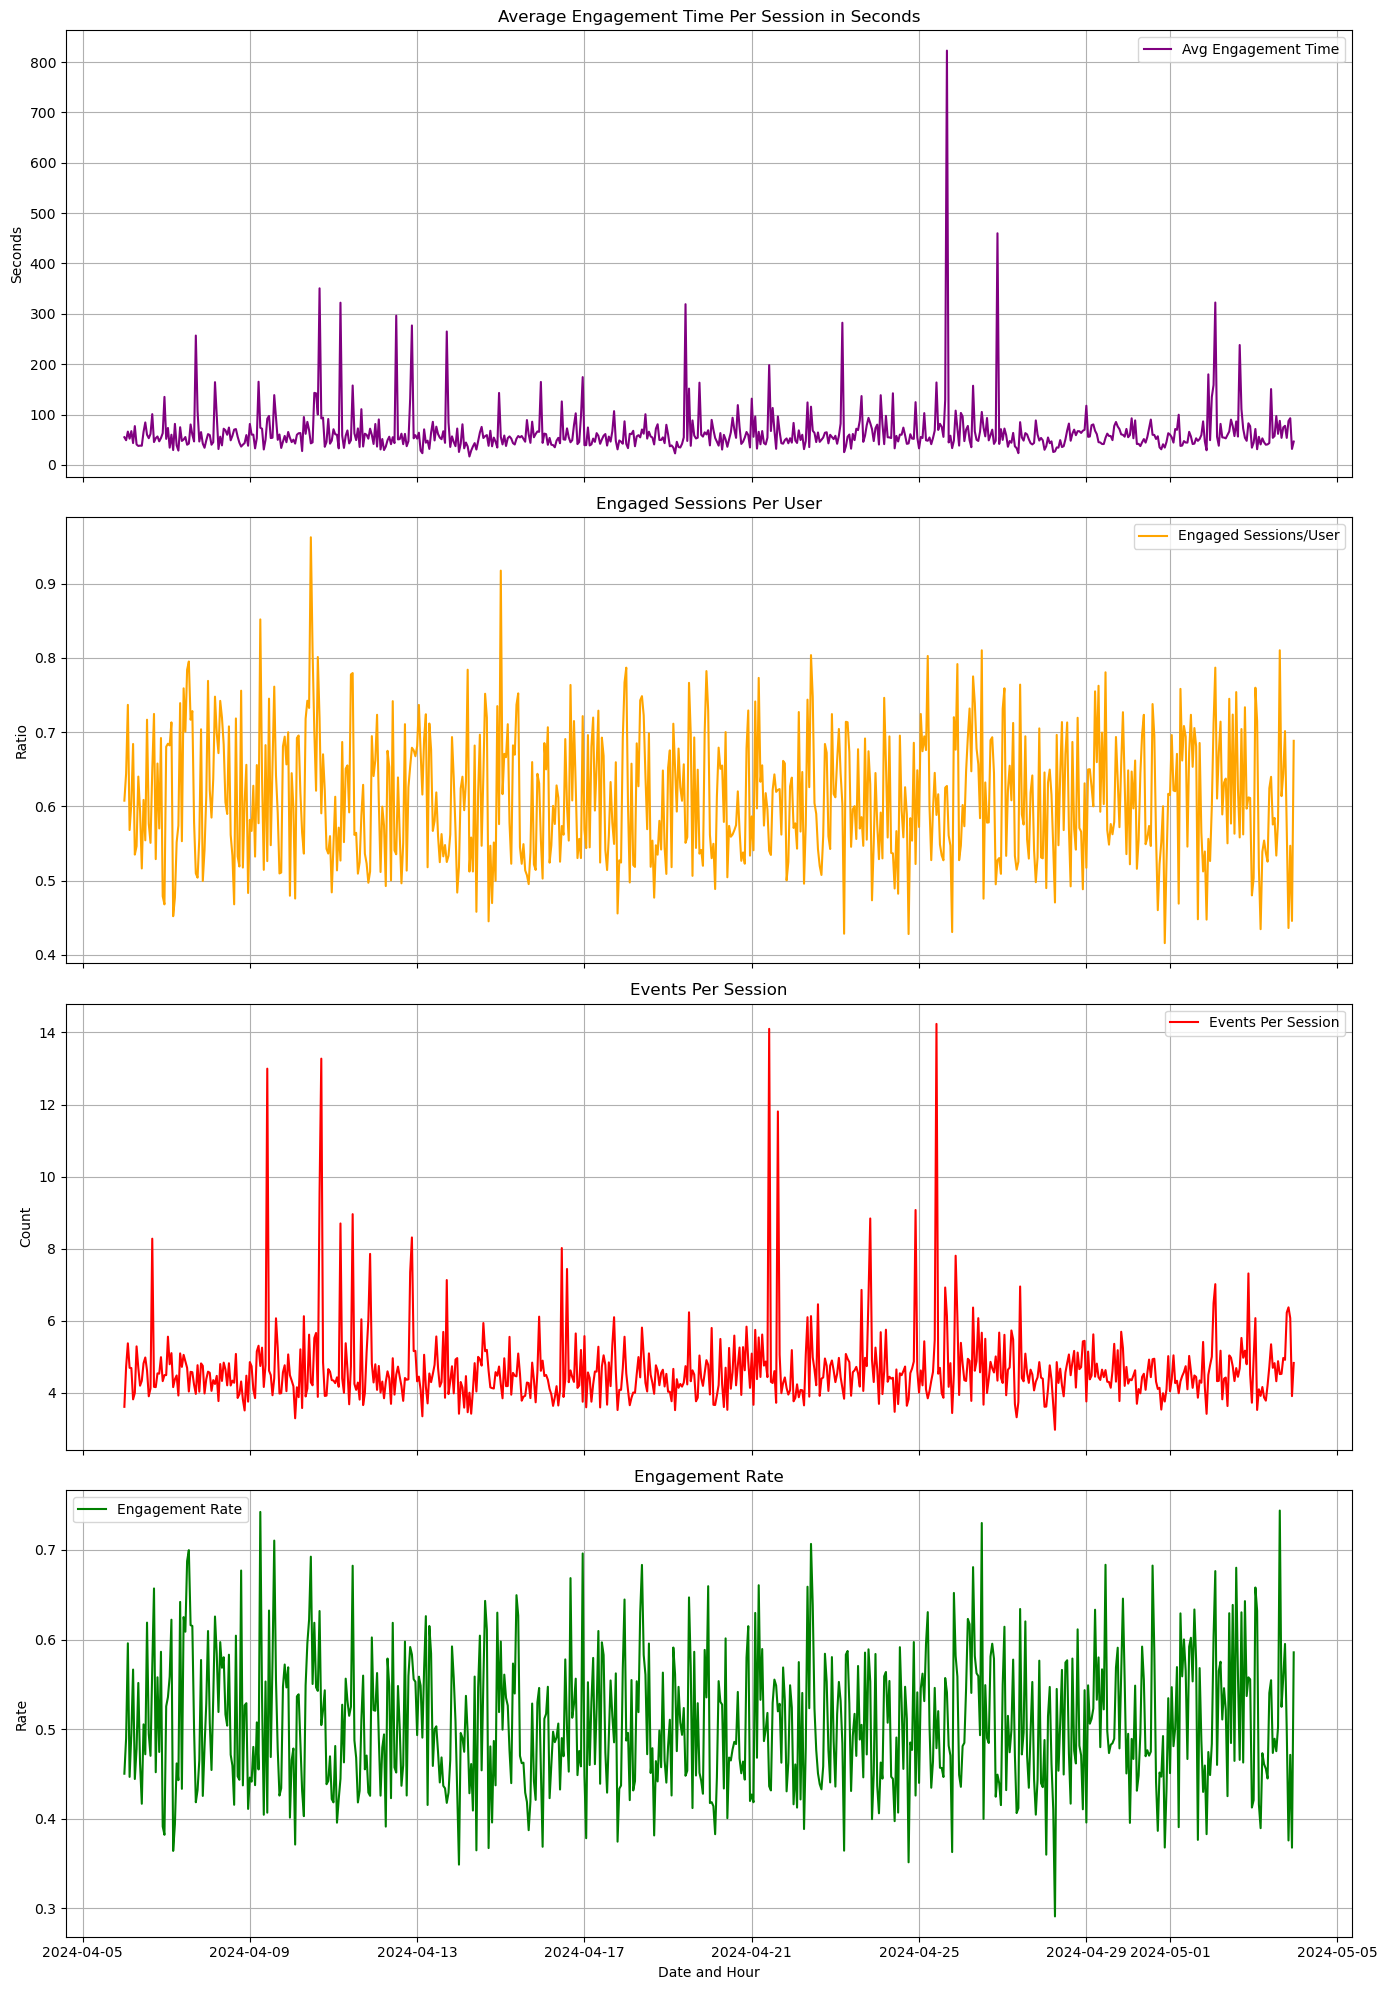

In [73]:
#3. Let's visualize engagement metrics using a time series line plot
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average Engagement Time Per Session in Seconds'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time Per Session in Seconds')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged Sessions Per User'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions Per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events Per Session'], label='Events Per Session', color='red')
ax[2].set_title('Events Per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement Rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()

# Save the plot to a file
plt.savefig('engagement_metrics_matplotlib.png')

plt.show()

In [109]:
#Visulaizing it with plotly
import plotly.graph_objects as go
import pandas as pd  # Assuming you're using pandas DataFrames

# Assuming 'engagement_metrics' is your pandas DataFrame

# Create a list of traces for each metric
traces = [
    go.Scatter(
        x=engagement_metrics.index,
        y=engagement_metrics['Average Engagement Time Per Session in Seconds'],
        mode='lines',
        name='Avg Engagement Time',
        line=dict(color='purple')
    ),
    go.Scatter(
        x=engagement_metrics.index,
        y=engagement_metrics['Engaged Sessions Per User'],
        mode='lines',
        name='Engaged Sessions/User',
        line=dict(color='orange')
    ),
    go.Scatter(
        x=engagement_metrics.index,
        y=engagement_metrics['Events Per Session'],
        mode='lines',
        name='Events Per Session',
        line=dict(color='red')
    ),
    go.Scatter(
        x=engagement_metrics.index,
        y=engagement_metrics['Engagement Rate'],
        mode='lines',
        name='Engagement Rate',
        line=dict(color='green')
    )
]

# Create subplots using make_subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.05,
                    subplot_titles=(
                        'Average Engagement Time Per Session in Seconds',
                        'Engaged Sessions Per User',
                        'Events Per Session',
                        'Engagement Rate'
                    ))

# Add each trace to its corresponding subplot
for i, trace in enumerate(traces):
    fig.add_trace(trace, row=i + 1, col=1)

# Update layout
fig.update_layout(
    height=1800,  # Adjust height as needed
    width=1100,
    title_text="Engagement Metrics Over Time",
    showlegend=False
)

# Update y-axis labels
fig.update_yaxes(title_text="Seconds", row=1, col=1)
fig.update_yaxes(title_text="Ratio", row=2, col=1)
fig.update_yaxes(title_text="Count", row=3, col=1)
fig.update_yaxes(title_text="Rate", row=4, col=1)

#Update x-axis label
fig.update_xaxes(title_text="Date and Hour", row=4, col=1)

# Save the plot to a file
plt.savefig('engagement_metrics_plotly.png')

fig.show(renderer="colab")


<font size ='5'>3. Let's examine the relationship between the variables.</font>

<Figure size 640x480 with 0 Axes>

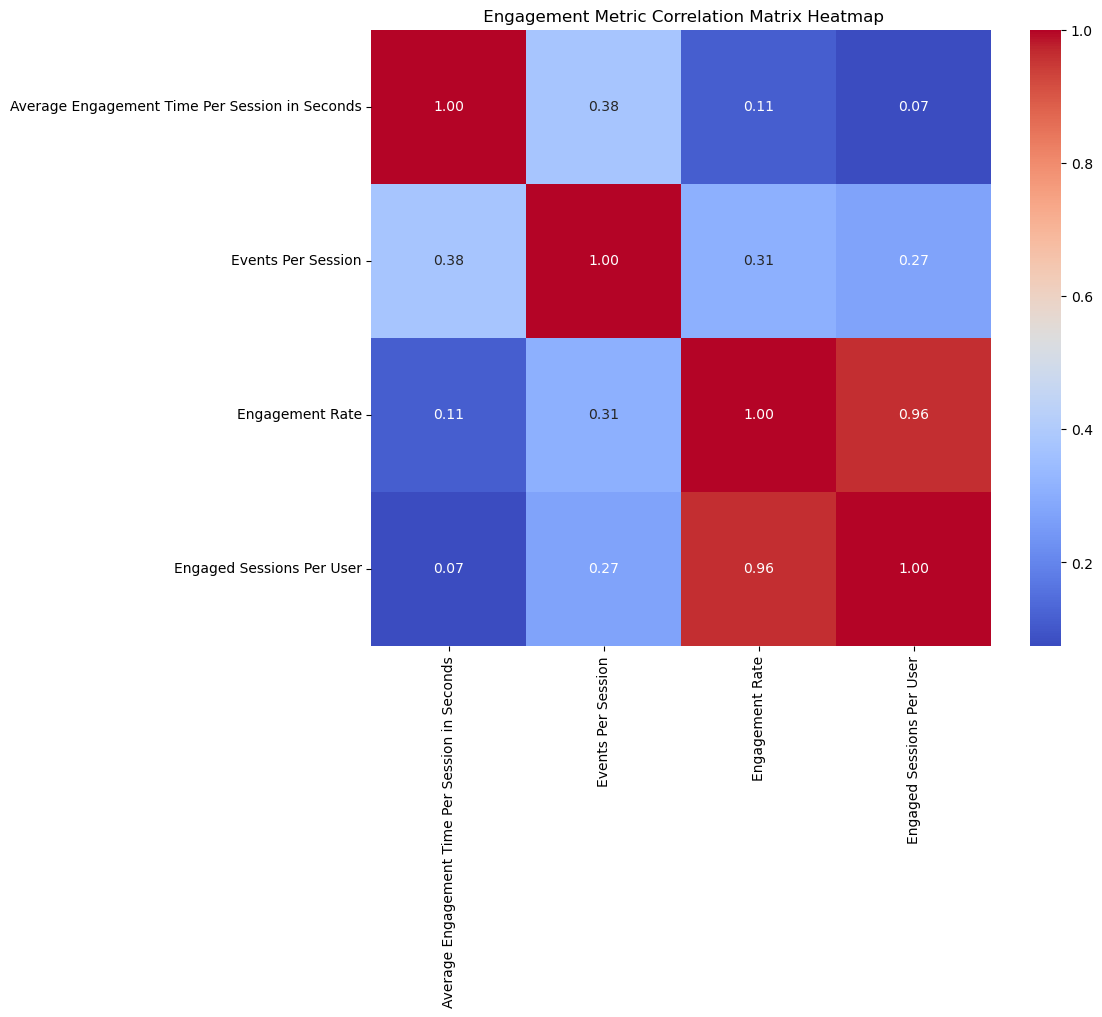

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df[['Average Engagement Time Per Session in Seconds', 'Events Per Session', 'Engagement Rate', 'Engaged Sessions Per User']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # fmt=".2f" formats the numbers to two decimal places.
plt.title(' Engagement Metric Correlation Matrix Heatmap')

# Save the plot to a file
plt.savefig('engagement_metrics_correlation_heatmap.png')
plt.show()

In [77]:
'''
General Interpretation of this Correlation Matrix HeatMap above:

1. Dark Red (1.00):
    - As you correctly stated, a correlation of 1.00 indicates a perfect positive correlation. This means that the two variables move perfectly in sync with each other. In your diagonal, this is expected as each metric is perfectly correlated with itself.
2 Red (0.96): 'Engaged Sessions Per User' and 'Engagement Rate':
    - This is a very strong positive correlation. It means that as the number of "Engaged Sessions Per User" increases, the "Engagement Rate" also increases almost perfectly.
    - FitFusion Implication: This suggests that if you can get users to have more engaged sessions, your overall engagement rate will see a significant boost. It's a key area to focus on for improvement.
3 Sky Blue/Blue/Dark Blue (Weak to Very Weak Positive Correlation):
    - These colors indicate varying degrees of weak positive correlation. It means that there is some tendency for the variables to move in the same direction, but the relationship is not strong.
    - FitFusion Implication: These weaker correlations suggest that those metrics don't have a very large impact on each other. So changes to one metric, will not cause a drastic change in the other. Those metrics may be influenced more by outside factors, or other metrics not displayed in the heatmap.
4 Diagonal (1.00):
    - As mentioned, this is a given. Every variable is perfectly correlated with itself.

Recommendation For FitFusion Website:

1.  Focus on 'Engaged Sessions Per User' and 'Engagement Rate':
    * The strong correlation here is the most important finding. It tells you that improving user engagement within individual sessions is crucial for boosting the overall engagement rate of your website.
    * Actionable Insights:
        * Look for ways to make sessions more interactive and valuable.
        * Consider adding features that encourage users to spend more time exploring content.
        * Analyze what factors contribute to engaged sessions and replicate those factors.

2.  Weak Correlations:
    * The weaker correlations suggest that those metrics may be influenced by other factors or that the relationship between them is not as direct.
    * Actionable Insights:
        * Try and determine what outside factors are influencing those weakly correlated metrics.
        * Consider adding more metrics to your analysis to see if they correlate stronger.

3.  Overall Strategy:
    * Based on your heatmap, prioritize efforts to increase "Engaged Sessions Per User." This will have a ripple effect, leading to a higher "Engagement Rate."
    * Use A/B testing or other methods to experiment with changes and measure their impact on these key metrics.

'''

'\nGeneral Interpretation of this Correlation Matrix HeatMap above:\n\n1. Dark Red (1.00):\n    - As you correctly stated, a correlation of 1.00 indicates a perfect positive correlation. This means that the two variables move perfectly in sync with each other. In your diagonal, this is expected as each metric is perfectly correlated with itself.\n2 Red (0.96): \'Engaged Sessions Per User\' and \'Engagement Rate\':\n    - This is a very strong positive correlation. It means that as the number of "Engaged Sessions Per User" increases, the "Engagement Rate" also increases almost perfectly.\n    - FitFusion Implication: This suggests that if you can get users to have more engaged sessions, your overall engagement rate will see a significant boost. It\'s a key area to focus on for improvement.\n3 Sky Blue/Blue/Dark Blue (Weak to Very Weak Positive Correlation):\n    - These colors indicate varying degrees of weak positive correlation. It means that there is some tendency for the variables t

<font size ='5'>**C. Marketing Channel Performance Analysis**</font> 

<font size ='5'>To assess how different marketing channels contribute to traffic and engagement. It will involve analyzing the session, user, and engagement data segmented by the marketing channels.</font>

In [78]:
# group data by channel and aggregate necessary metrics
channel_performance = df.groupby('Marketing Channels').agg({
    'No. Of Users': 'sum',
    'No. Of Session of Users': 'sum',
    'Engaged sessions': 'sum',
    'Engagement Rate': 'mean',
    'Events Per Session': 'mean'
})

In [79]:
# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement Rate'] / channel_performance['Engagement Rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events Per Session'] / channel_performance['Events Per Session'].max()

In [80]:
'''
Why Normalize?

Normalization is the process of scaling numerical data to a common range, usually between 0 and 1. In this case, it's done by dividing each value in the column by the maximum value in that column.

Why Normalize?
1. Comparison: Normalization allows you to compare metrics that have different scales or units. 
For example, engagement rate is a percentage, while events per session is a count. 
Normalizing them makes it easier to compare their relative performance across different channels.

2. Visual Representation: When plotting these metrics on the same chart, normalization ensures that they are displayed on a similar scale, 
making it easier to visualize and compare their relative magnitudes.

3. Avoiding Bias: If you were to plot the raw values of 'Engagement rate' and 'Events per session' without normalization, 
one metric might dominate the chart simply because it has a larger numerical range. Normalization prevents this bias.
'''

"\nWhy Normalize?\n\nNormalization is the process of scaling numerical data to a common range, usually between 0 and 1. In this case, it's done by dividing each value in the column by the maximum value in that column.\n\nWhy Normalize?\n1. Comparison: Normalization allows you to compare metrics that have different scales or units. \nFor example, engagement rate is a percentage, while events per session is a count. \nNormalizing them makes it easier to compare their relative performance across different channels.\n\n2. Visual Representation: When plotting these metrics on the same chart, normalization ensures that they are displayed on a similar scale, \nmaking it easier to visualize and compare their relative magnitudes.\n\n3. Avoiding Bias: If you were to plot the raw values of 'Engagement rate' and 'Events per session' without normalization, \none metric might dominate the chart simply because it has a larger numerical range. Normalization prevents this bias.\n"

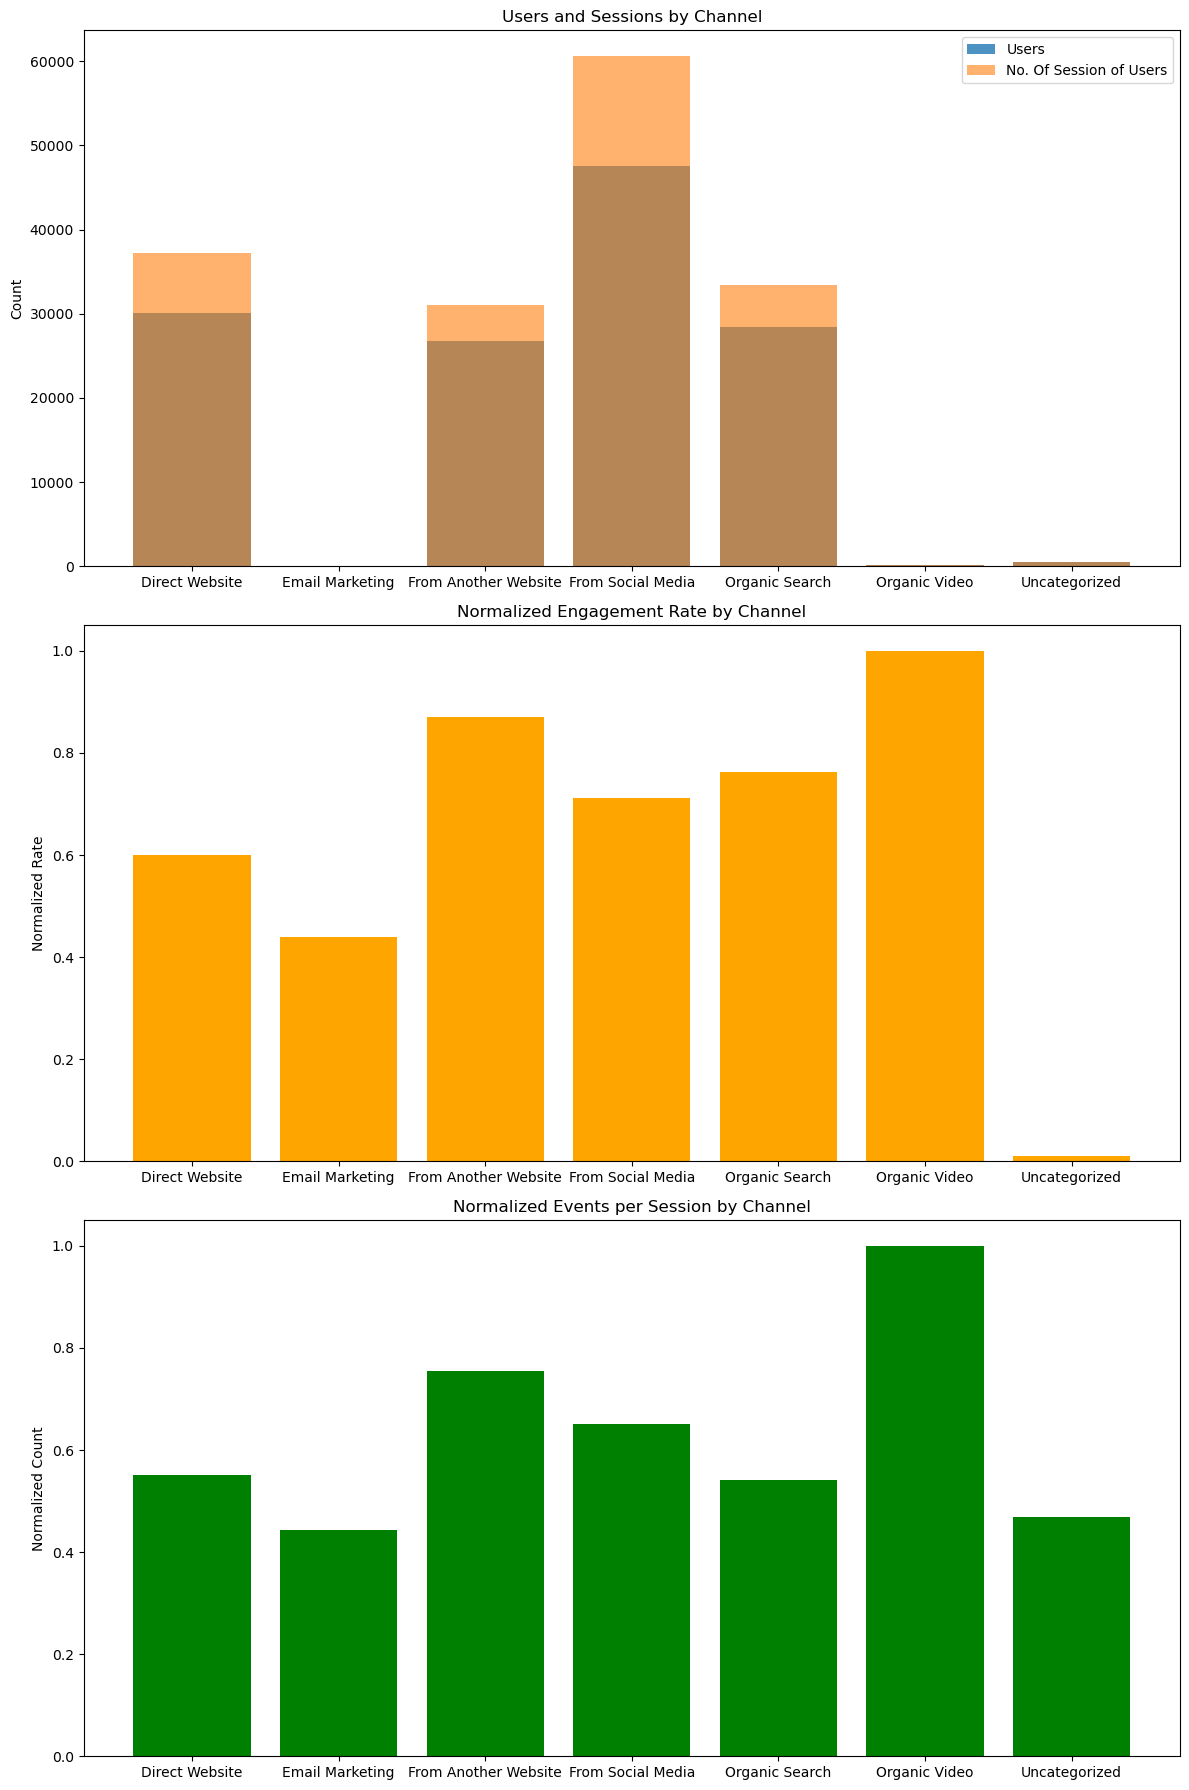

In [81]:
# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['No. Of Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['No. Of Session of Users'], label='No. Of Session of Users', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.savefig('Channel_performance_Metrics')
plt.show()

In [82]:
'''
Based on this chart, Social Media has the highest number of users and sessions traffic.
'Organic Video' followed by 'From Another Website' has the highest number of Engagement Rate and 'Events By Session' by channel
'''

"\nBased on this chart, Social Media has the highest number of users and sessions traffic.\n'Organic Video' followed by 'From Another Website' has the highest number of Engagement Rate and 'Events By Session' by channel\n"

<font size ='5'>**D. Let's forecast the Website Traffic for the next 24 hours**</font>

<font size='4'>We want to guess how many people will visit our website in the next 24 hours. To do this, we'll use a special method called a 'time series model'. This model looks at how our website traffic has changed over time and uses those patterns to predict the future.</font>

<font size ='4'>First, we need to understand the patterns in our data. We'll do this by making two special charts:</font>

<font size ='4'>**Autocorrelation Chart**: This chart helps us see if there are any repeating patterns in our traffic. For example, does traffic on one hour affect traffic on the next hour?</font>

<font size ='4'>**Partial Autocorrelation Chart**: This chart is similar, but it helps us see direct relationships, removing the influence of the hours in between.</font>

In [40]:
print(df['No. Of Session of Users'].isna().sum())

0


In [41]:
df.index = pd.to_datetime(df.index)

In [83]:
print(df.index.dtype)

int64


C:\Users\mowan\AppData\Local\Temp\ipykernel_4240\2059190346.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



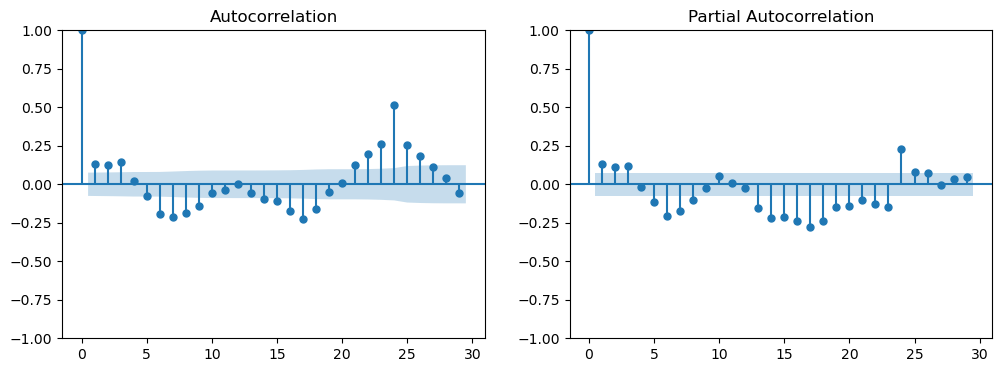

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['No. Of Session of Users'].asfreq('h').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.savefig('ACF and PACF Chart.png')
plt.show()

In [85]:
'''
Now, what does this chart above mean?
1. PACF Chart:
This chart shows us how much just the day before matters. We find the first big spike. 
If it's at '1', we know the day before is key. So, we use '1'.

2. ACF Chart:
This chart shows how all the past days matter. We see how fast the lines go down. 
If they go down slow, old days matter. We see a jump at '1', so we start with '1'.

3. The "d" Number:
We have patterns that repeat. We use '1' to tell the tool to find those patterns.
'''

'\nNow, what does this chart above mean?\n1. PACF Chart:\nThis chart shows us how much just the day before matters. We find the first big spike. \nIf it\'s at \'1\', we know the day before is key. So, we use \'1\'.\n\n2. ACF Chart:\nThis chart shows how all the past days matter. We see how fast the lines go down. \nIf they go down slow, old days matter. We see a jump at \'1\', so we start with \'1\'.\n\n3. The "d" Number:\nWe have patterns that repeat. We use \'1\' to tell the tool to find those patterns.\n'

<font size ='5'>Now, Let's forecast the website’s traffic for the next 24 hours using the SARIMA model.</font>

C:\Users\mowan\AppData\Local\Temp\ipykernel_4240\2437685353.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\mowan\AppData\Local\Temp\ipykernel_4240\2437685353.py:18: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



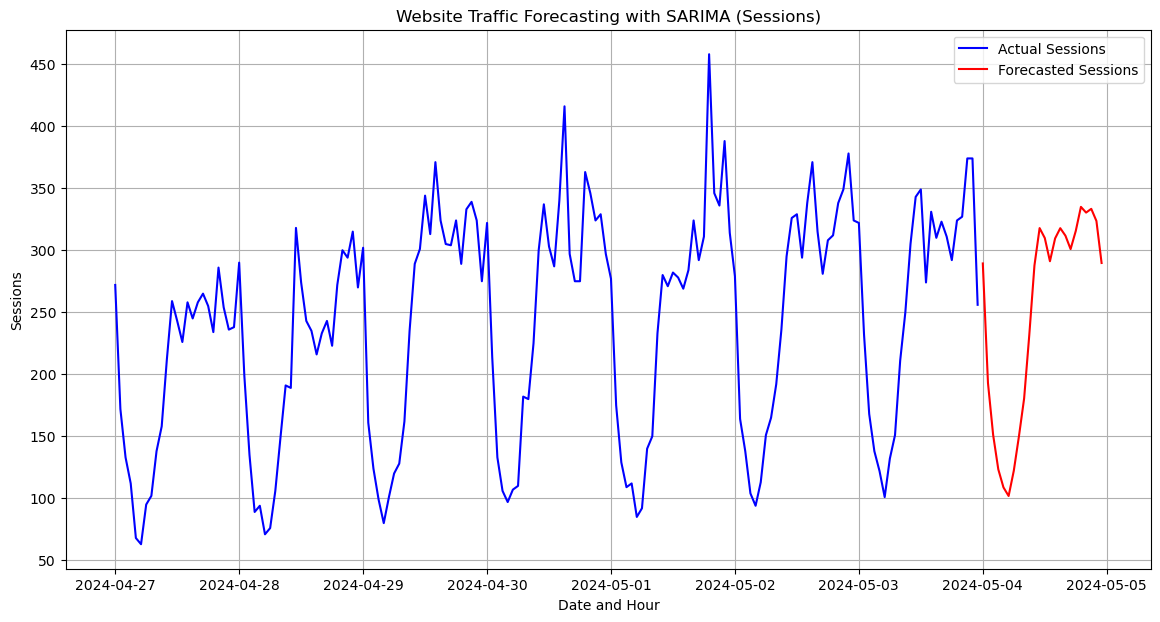

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['No. Of Session of Users'].asfreq('h').fillna(method='ffill')
seasonal_period = 24


sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.savefig('Website Traffic Forecasting_matplotlib.png')
plt.show()

In [110]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming grouped_data is already defined and contains the time series data
time_series_data = grouped_data['No. Of Session of Users'].asfreq('h').fillna(method='ffill')
seasonal_period = 24

sarima_model = SARIMAX(time_series_data,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# Create Plotly figure
fig = go.Figure()

# Add actual data (last 168 hours)
fig.add_trace(go.Scatter(x=time_series_data.index[-168:], y=time_series_data[-168:], mode='lines', name='Actual Sessions'))

# Add forecasted data
forecast_index = pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:]
fig.add_trace(go.Scatter(x=forecast_index, y=sarima_forecast, mode='lines', name='Forecasted Sessions'))

# Update layout
fig.update_layout(
    title='Website Traffic Forecasting with SARIMA (Sessions)',
    xaxis_title='Date and Hour',
    yaxis_title='Sessions',
    xaxis_rangeslider_visible=True, # optional
    template="plotly_white", #optional, for a clean white background
)

# Show the figure
fig.show(renderer="colab")



C:\Users\mowan\AppData\Local\Temp\ipykernel_4240\1830567868.py:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\mowan\AppData\Local\Temp\ipykernel_4240\1830567868.py:24: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [96]:
print(df['No. Of Session of Users'])

0       300
1       267
2       233
3       256
4       221
       ... 
3177      1
3178      1
3179      1
3180      1
3181      1
Name: No. Of Session of Users, Length: 3182, dtype: int64
